# Übung 9: Machine Learning mit Support Vector Machines (SVM)

Student: Remo Schwarzentruber

##  Support Vector Machine

In dieser Übung wollen wir Support Vector Machines betrachten. Obwohl auch OpenCV eine Implementation von SVMs beinhaltet möchten wir diesmal die Python Implementation von scikit-learn verwenden. Dazu müsses Sie allenfalls noch das enstprechende Packet mittels `pip3 install sklearn` installieren.

In [2]:
# OpenCV needs to be included first
import cv2
import numpy as np

# we will use the svm from sklearn
from sklearn import svm
import sklearn
from sklearn import metrics

# for displaying images in jupyter
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In einer früheren Übung haben wir von unseren Photobox Bildern mit grünen Hintergrund die Hände vom Hintergrund mittels Farbsegemtnierung getrennt. Die Bereiche mussten wir dabei selber finden. In dieser Übung möchten wir eine SVM einsetzen um diese Klassifizierung zu machen.

Zuerst wollen wir die Bilder laden und darstellen.

(576, 864, 3)
(576, 864, 3)


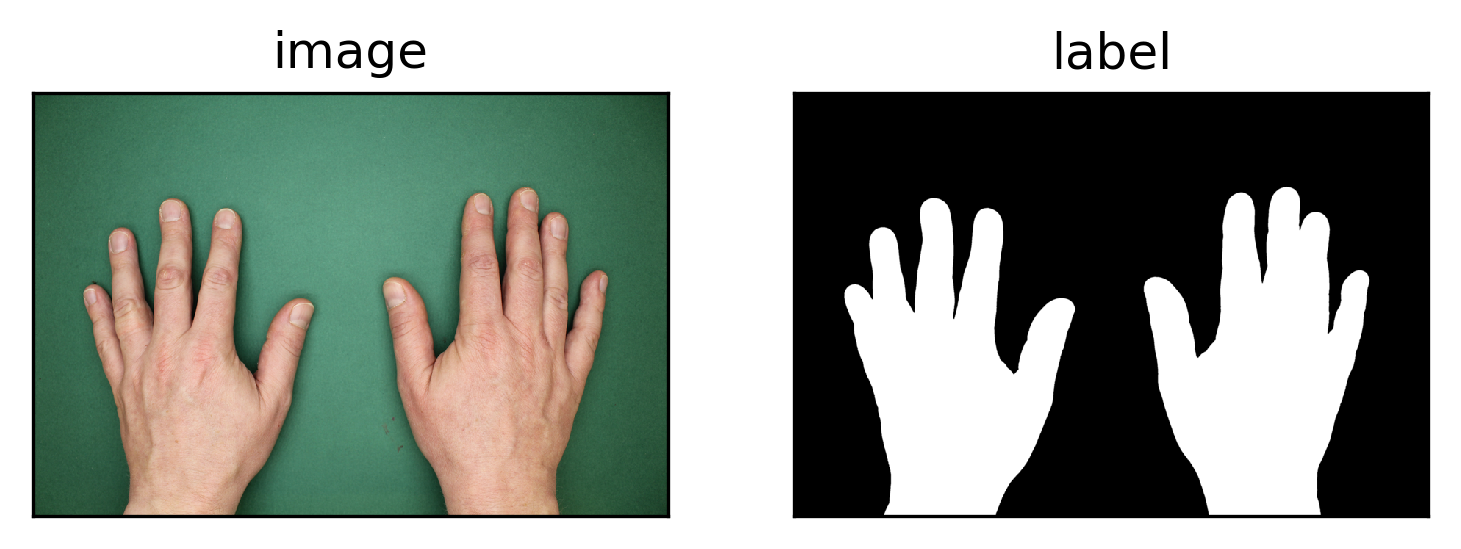

In [3]:
image  = cv2.imread('../data/hand_small.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
label = cv2.imread('../data/label_small.png')


plt.subplot(1, 2, 1)
plt.title('image'), plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('label'), plt.xticks([]), plt.yticks([])
plt.imshow(label)

# Zeigt Dimension des Array (Höhe, Breite, Anzahl Farbkanäle)
print(image.shape)
print(label.shape)

### Aufgabe 1: Linear SVM

Als Features für die SVM wollen wir 2D Daten benutzen um sie besser darstellen zu können. Da die Segmentierung auf den Farben basieren soll, zum Beispiel Hue und Saturation. Wir müssen also das Bild in HSV umwandeln.

Die SVM braucht keine Bilddaten, sondern nur ein Array von Werten.


In [4]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Extrahiert alle Bildpunkte als HSV-Werte, ohne Höhe und Breite
hs = hsv[:,:,0:2]

# ReShape => in ein 1-dimensionales Array
data = hs.reshape((-1,2))
print(data.shape)

(497664, 2)


Wir brauchen die Labels in der gleichen Form.

In [5]:
label_grey = label[:,:,0]

# ReShape => in ein 1-dimensionales Array
classes = label_grey.reshape(-1)
print(classes.shape)

(497664,)


Da wir Pixel für die Trainingsdaten verwenden, erhalten wir sehr viele Trainings Daten. Für die SVM wird das recht aufwendig, deshalben sollten wir erst mal die Anzahl Daten reduzieren in dem wir nur jedes n-te Pixel nehmen. Späten können wir n verändern um bessere Ergebnisse mit mehr Trainingsdaten zu erhalten.

In [6]:
# n = Downsampling (höheres n = niedrigere Qualität / weniger Samples)
n = 1000
classes_reduced = classes[1::n]
data_reduced = data[1::n,:]
print(classes_reduced.shape)
print(data_reduced.shape)

(498,)
(498, 2)


Wir können die Features nun als Scatterplot darstellen. Dazu möchten wir die Daten zuerst noch in die positiven und negativen Beispiele unterteilen.

In [7]:
positives = data_reduced[classes_reduced==0]
negatives = data_reduced[classes_reduced==255]
print(positives.shape)
print(negatives.shape)

(336, 2)
(157, 2)


und nun der Plot

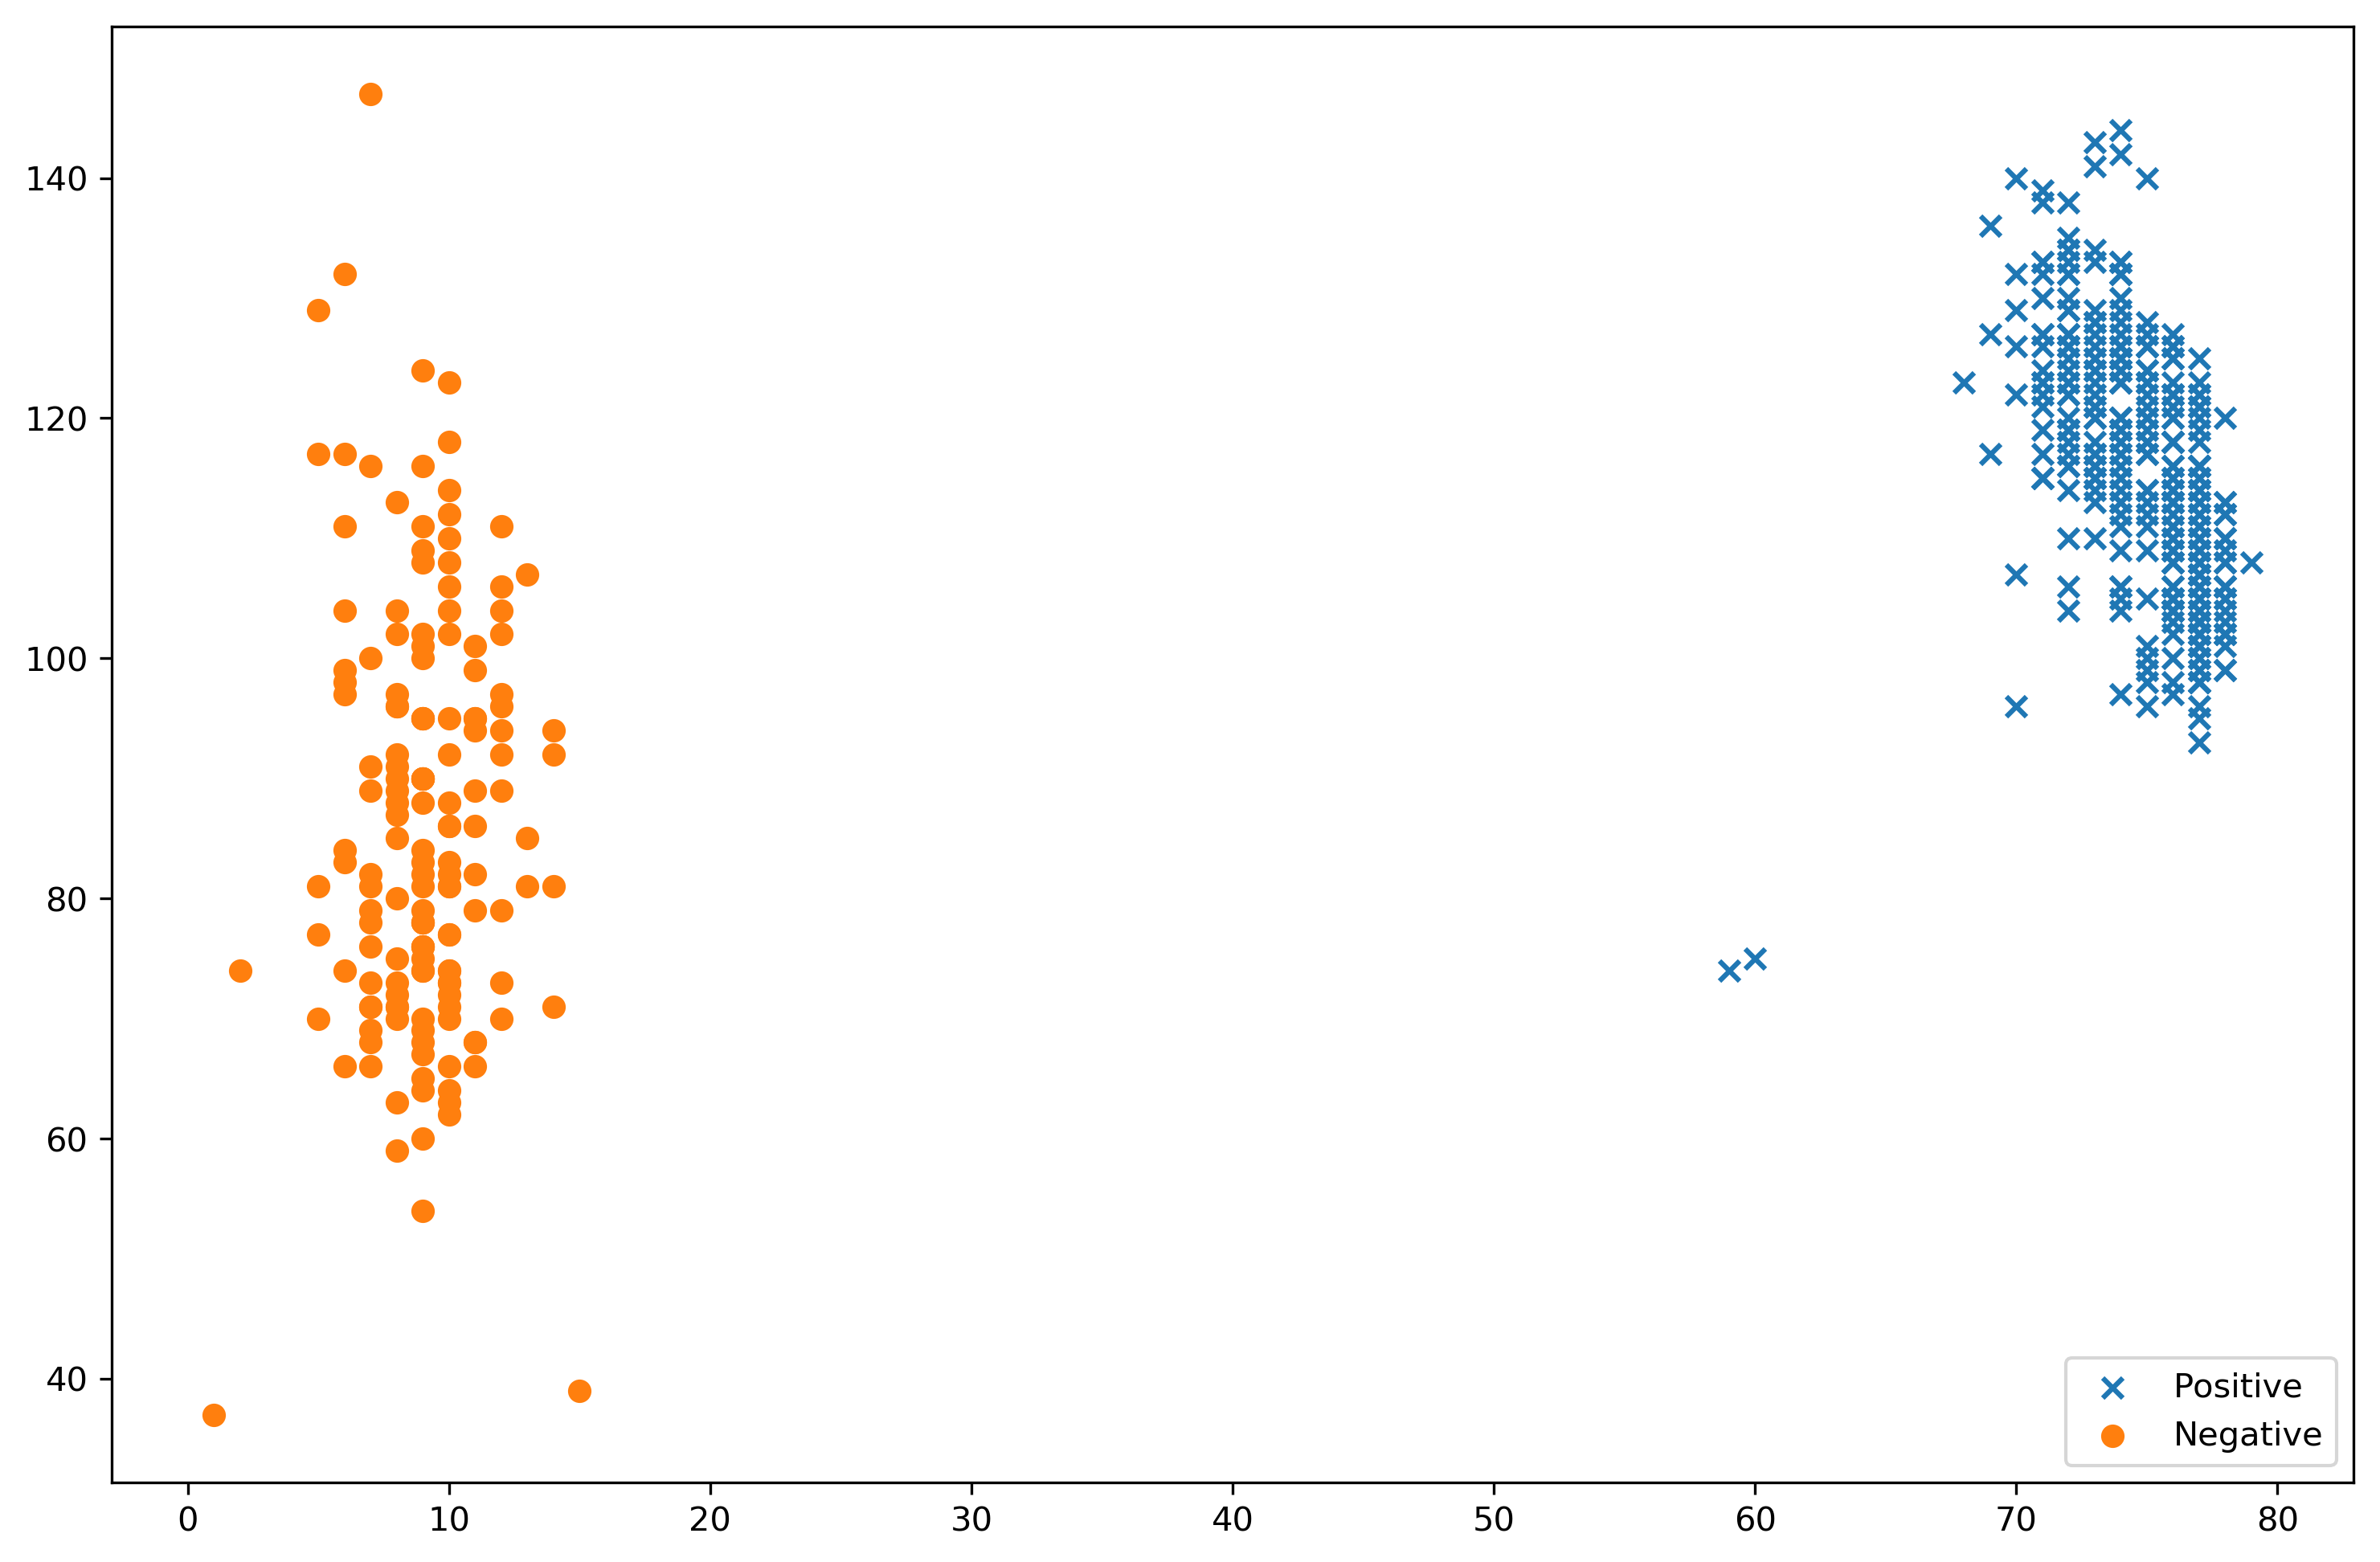

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positives[:,0], positives[:,1], marker='x', label='Positive')
ax.scatter(negatives[:,0], negatives[:,1], marker='o', label='Negative')
ax.legend()

Wir erzeugen einen SVM Klassifier mittels `svm.SVC`. Der Parameter C bestimmt den Fehlerterm, ein grösserer Wert von C zwingt die SVM mehr Samples richtig zu klassifizieren (auf Kosten von einer glätteren Entscheidungsfunktion).

In [14]:
classifier = svm.SVC(C=1.0, gamma='auto')

Die Funktion `fit` trainiert den Klassifikator.

In [15]:
classifier.fit(data_reduced, classes_reduced)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Wir können die Qualität der Klassifikation mittels der Score Funktion Überprüfen. Dazu können wir auch den ganzen Datensatz benutzen, da die Auswertung (im Allgemeinen) wesentlich schneller als das Trainieren geht. Genau genommen hängt es von der Anzahl Support Vektoren ab.

In [16]:
classifier.score(data,classes)

0.9770286779835391

### Aufgabe 2: Validierung

Laden Sie nun das 2. Bild und überprüfen Sie, welchen Score dass sie auf diesem Bild erreichen mit der bereits trainierten SVM. 

Berechnen Sie dann die Klassifizierung, die der Classifier auf den Daten berechnet (mittels `predict`) und stellen Sie das Resultat wieder als Bild dar (mittels `reshape` können Sie das 1D Resultat wieder in ein 2D Bild umwandeln)

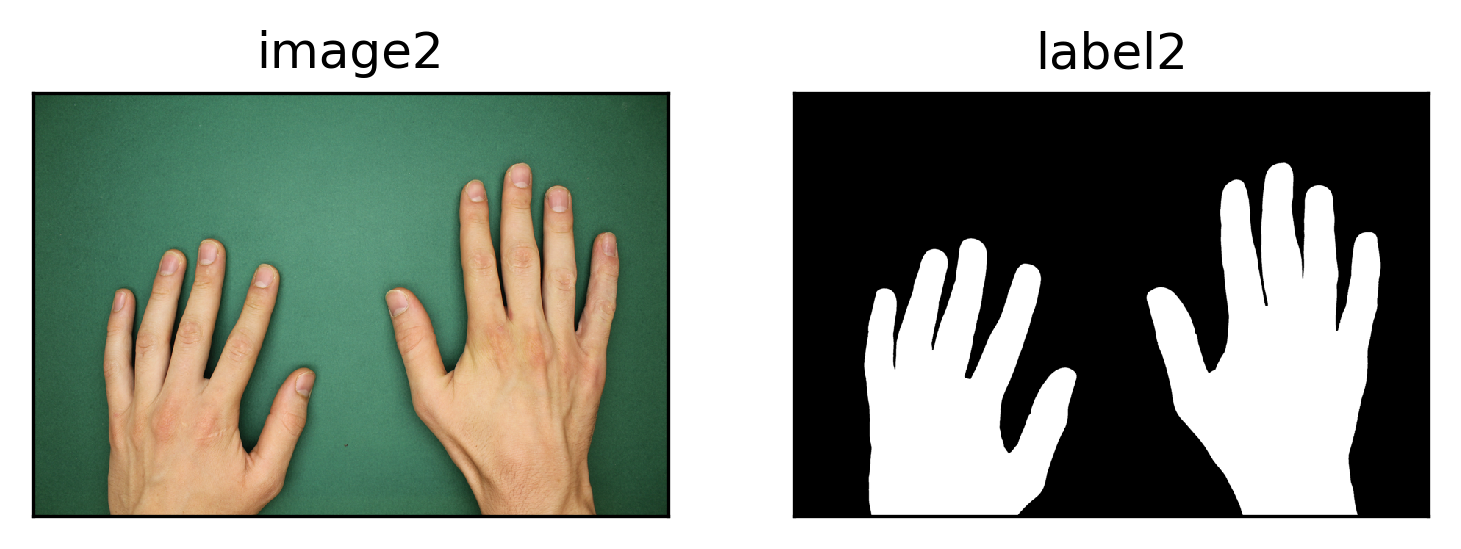

In [17]:
image2  = cv2.imread('../data/hand_small_2.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
label2 = cv2.imread('../data/label_small_2.png')

plt.subplot(1, 2, 1)
plt.title('image2'), plt.xticks([]), plt.yticks([])
plt.imshow(image2)

plt.subplot(1, 2, 2)
plt.title('label2'), plt.xticks([]), plt.yticks([])
plt.imshow(label2)

Verändern sie nun das n, das für das Downsampling verwendet wurde. Erhalten Sie bessere Ergebnisse mit kleinerem n? Wie sieht es aus, wenn Sie C ändern.

### Bild 2
#### 2 - Version mit n=1000 und c = 1.0

INFO: classes2.shape=(497664,)
INFO: classes_reduced2.shape=(498,)
INFO: data_reduced2.shape=(498, 2)
INFO: positives2.shape=(329, 2)
INFO: negatives2.shape=(163, 2)


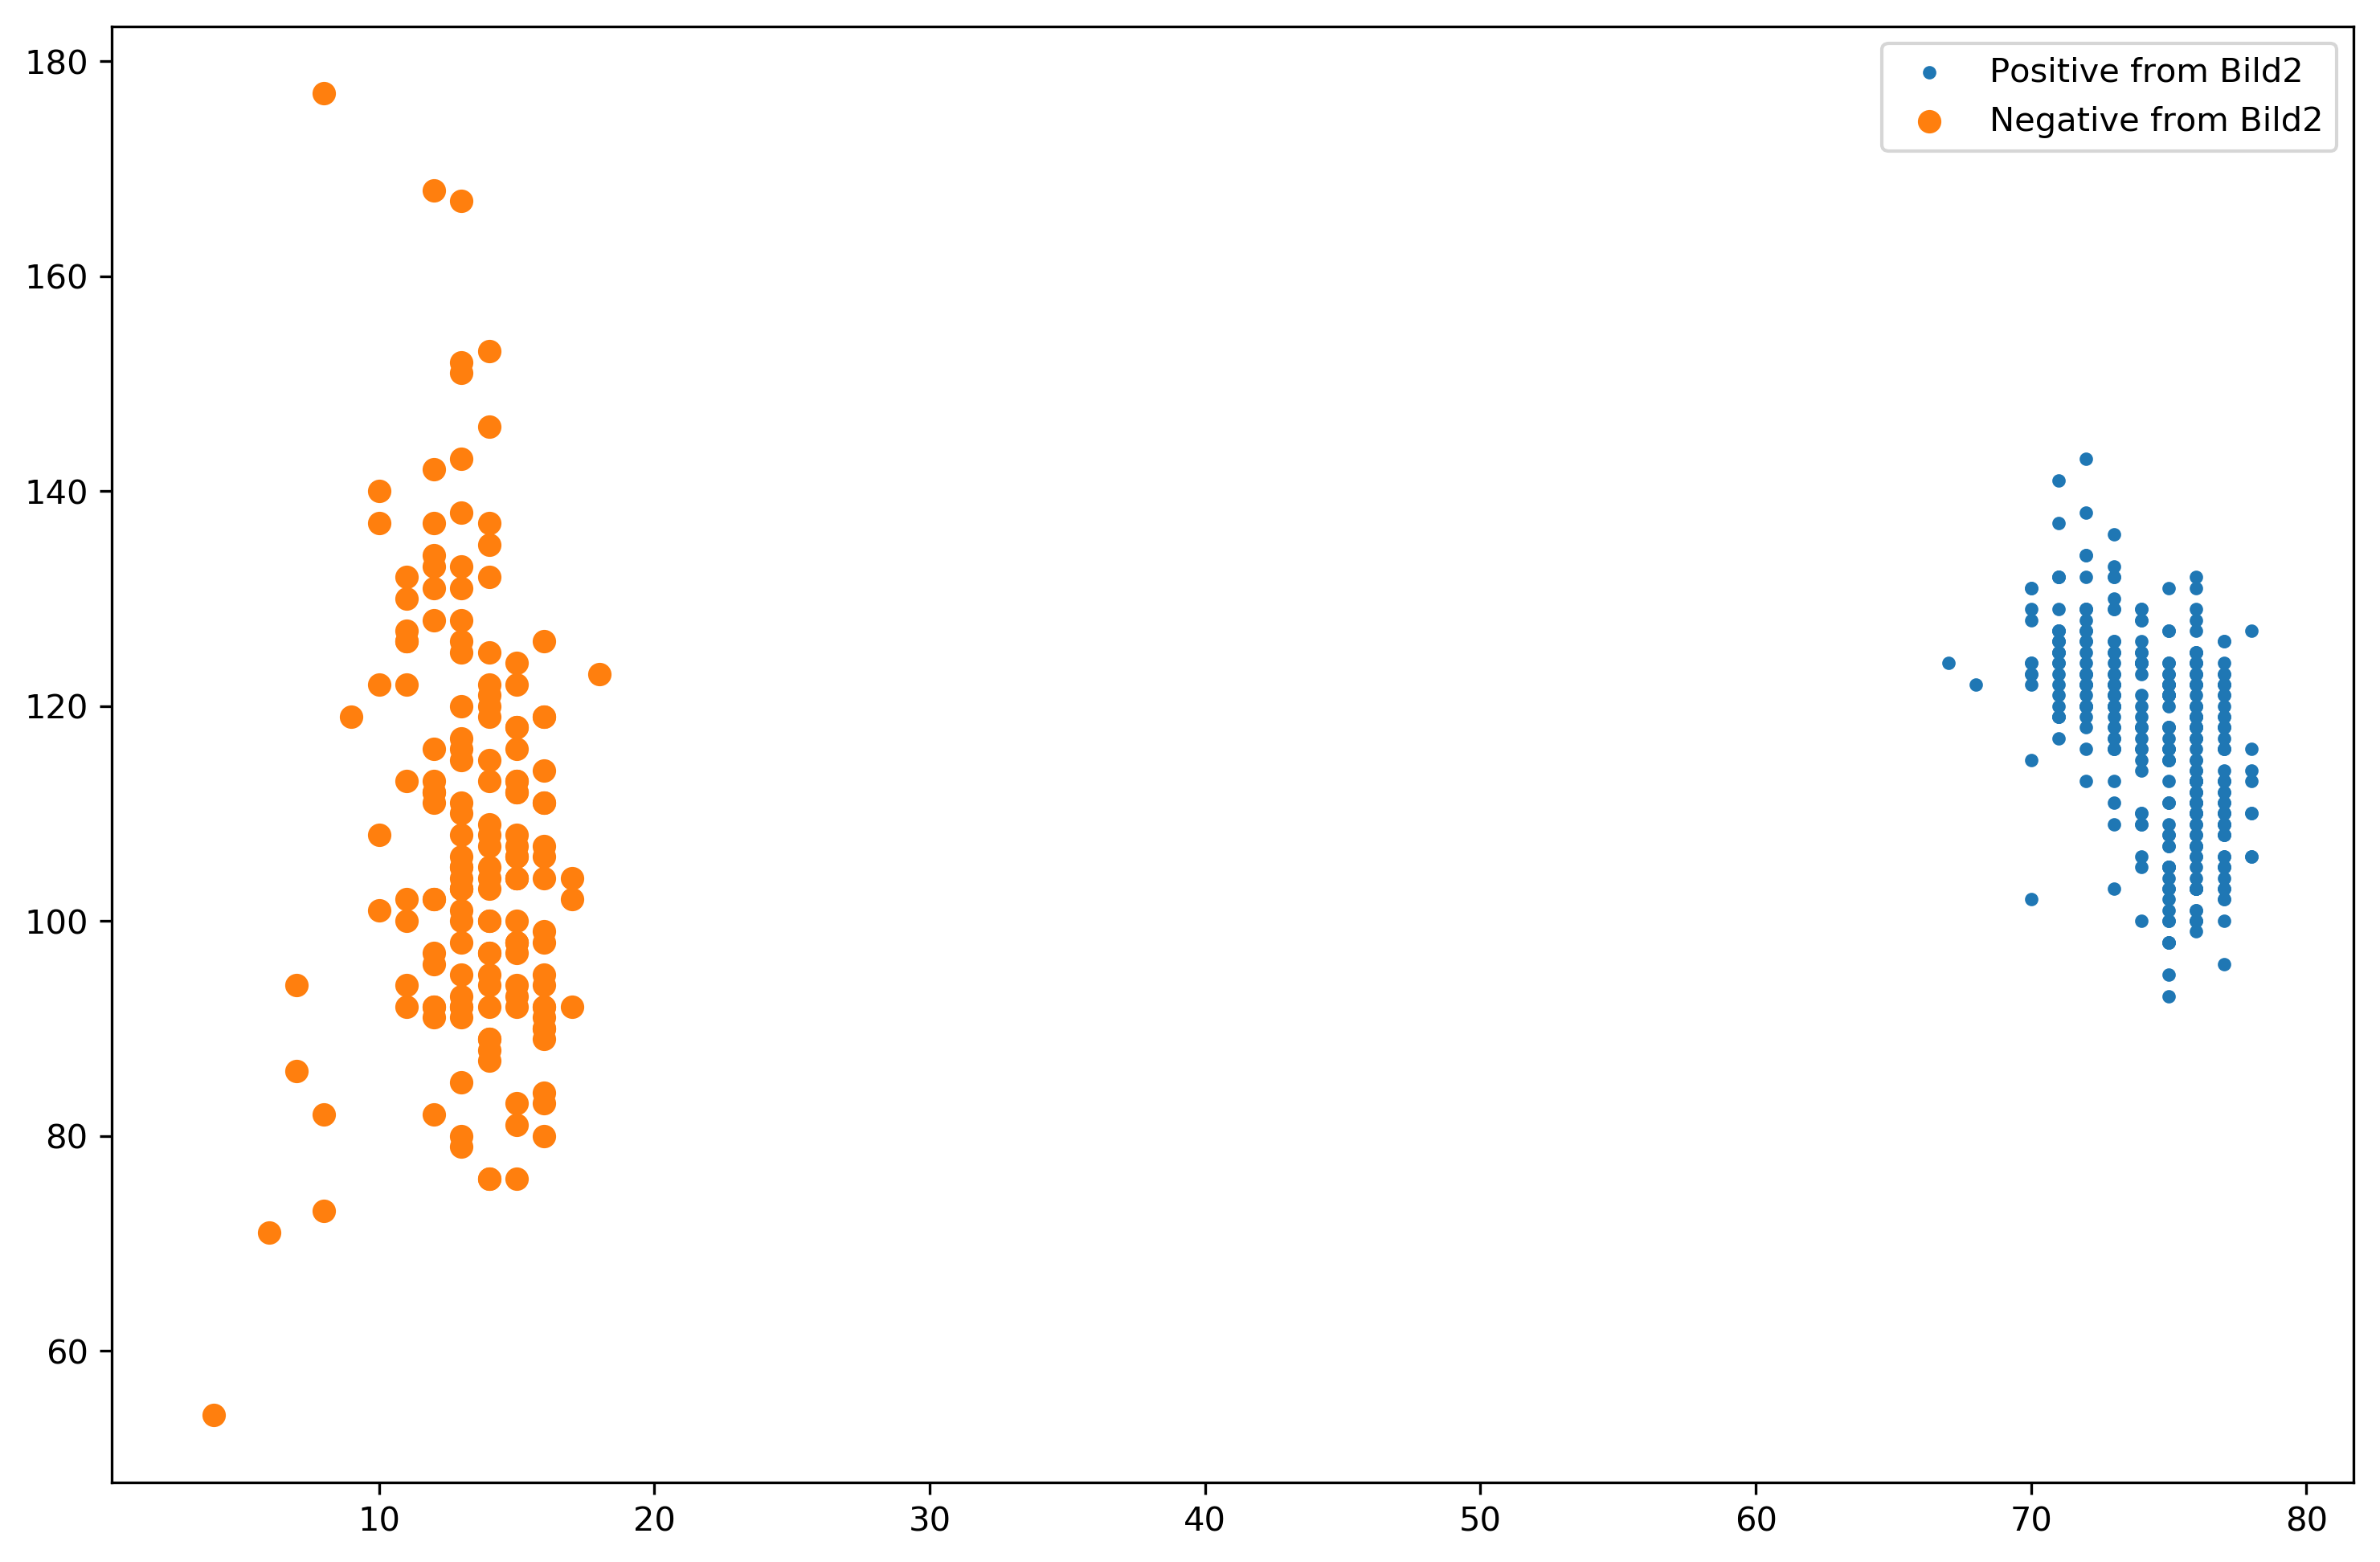

In [18]:
# convert to hsv
hsv2 = cv2.cvtColor(image2, cv2.COLOR_RGB2HSV)
hs2 = hsv2[:,:,0:2]
data2 = hs2.reshape((-1,2))

# label
label_grey2 = label2[:,:,0]
classes2 = label_grey2.reshape(-1)
print("INFO: classes2.shape=" + str(classes2.shape))

# n
n2 = 1000
classes_reduced2 = classes2[1::n2]
data_reduced2 = data2[1::n2,:]
print("INFO: classes_reduced2.shape=" + str(classes_reduced2.shape))
print("INFO: data_reduced2.shape=" + str(data_reduced2.shape))

positives2 = data_reduced2[classes_reduced2==0]
negatives2 = data_reduced2[classes_reduced2==255]
print("INFO: positives2.shape=" + str(positives2.shape))
print("INFO: negatives2.shape=" + str(negatives2.shape))

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positives2[:,0], positives2[:,1], marker='.', label='Positive from Bild2')
ax.scatter(negatives2[:,0], negatives2[:,1], marker='o', label='Negative from Bild2')
ax.legend()

Ausgabe von dem Score mit `score`

In [19]:
classifier.score(data2, classes2)

0.9783006204989712

(Text(0.5, 1.0, 'n = 1000, C = 1.0'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

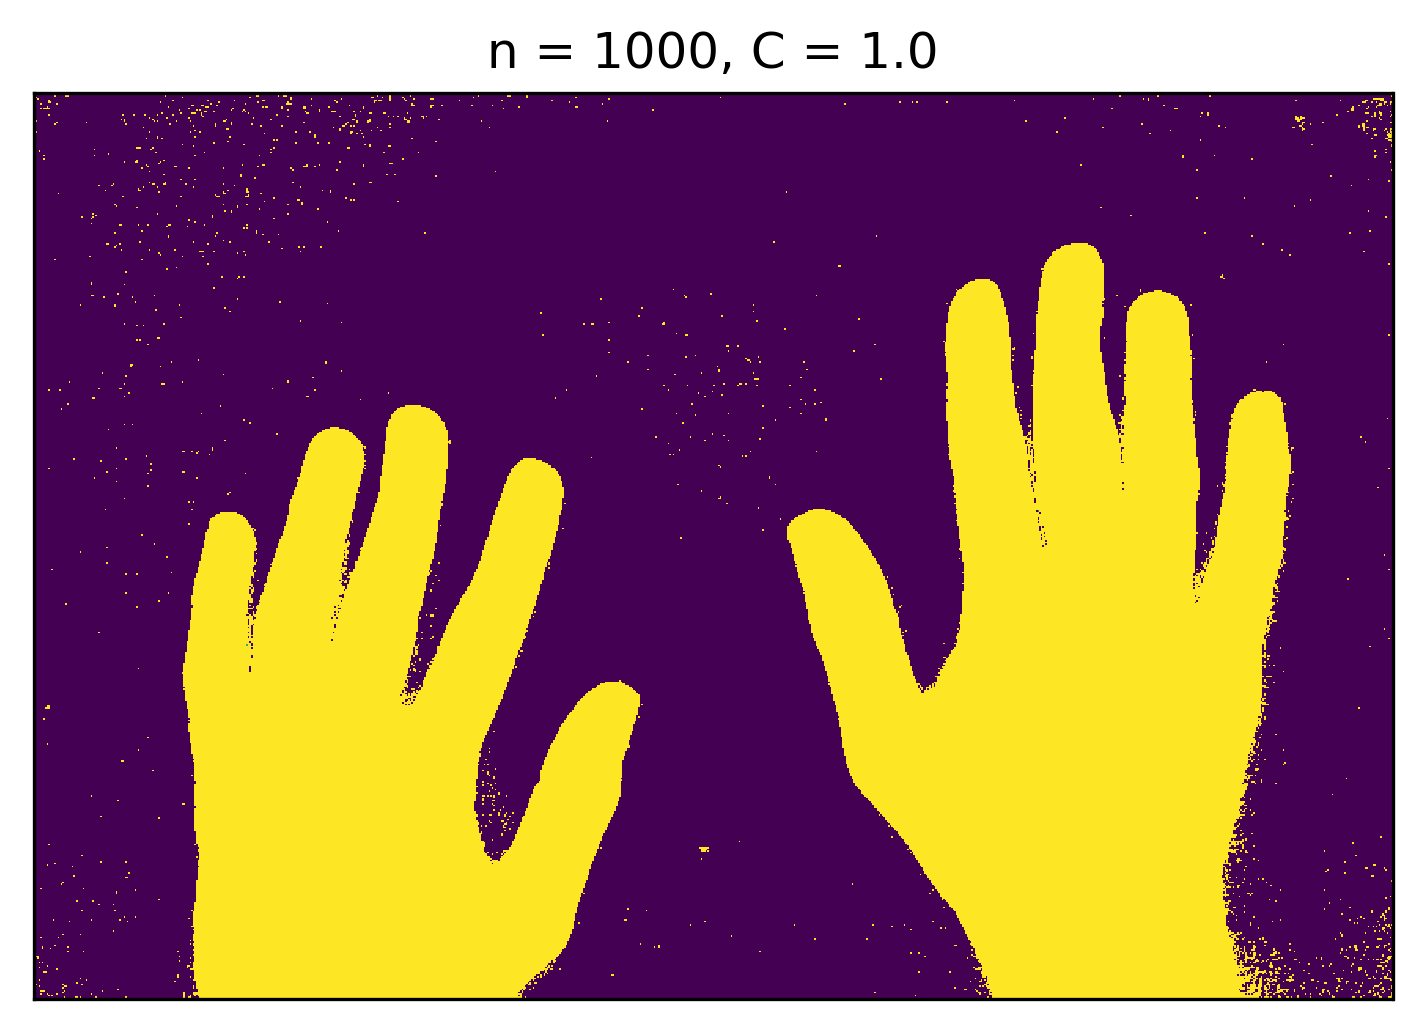

In [20]:
# Klassifiziert samples anhand der Entscheidungskurve (-gerade)
res_arr1 = classifier.predict(data2)
res_arr1.shape
res_img1 = res_arr1.reshape(576, -1)
res_img1.shape

plt.imshow(res_img1)
plt.title('n = 1000, C = 1.0'), plt.xticks([]), plt.yticks([])

### Bild 2
#### 3 - Version mit n=10 und c = 0.5

INFO: classes_reduced3.shape=(49767,)
INFO: data_reduced3.shape=(49767, 2)
INFO: positives3.shape=(33067, 2)
INFO: negatives3.shape=(16044, 2)


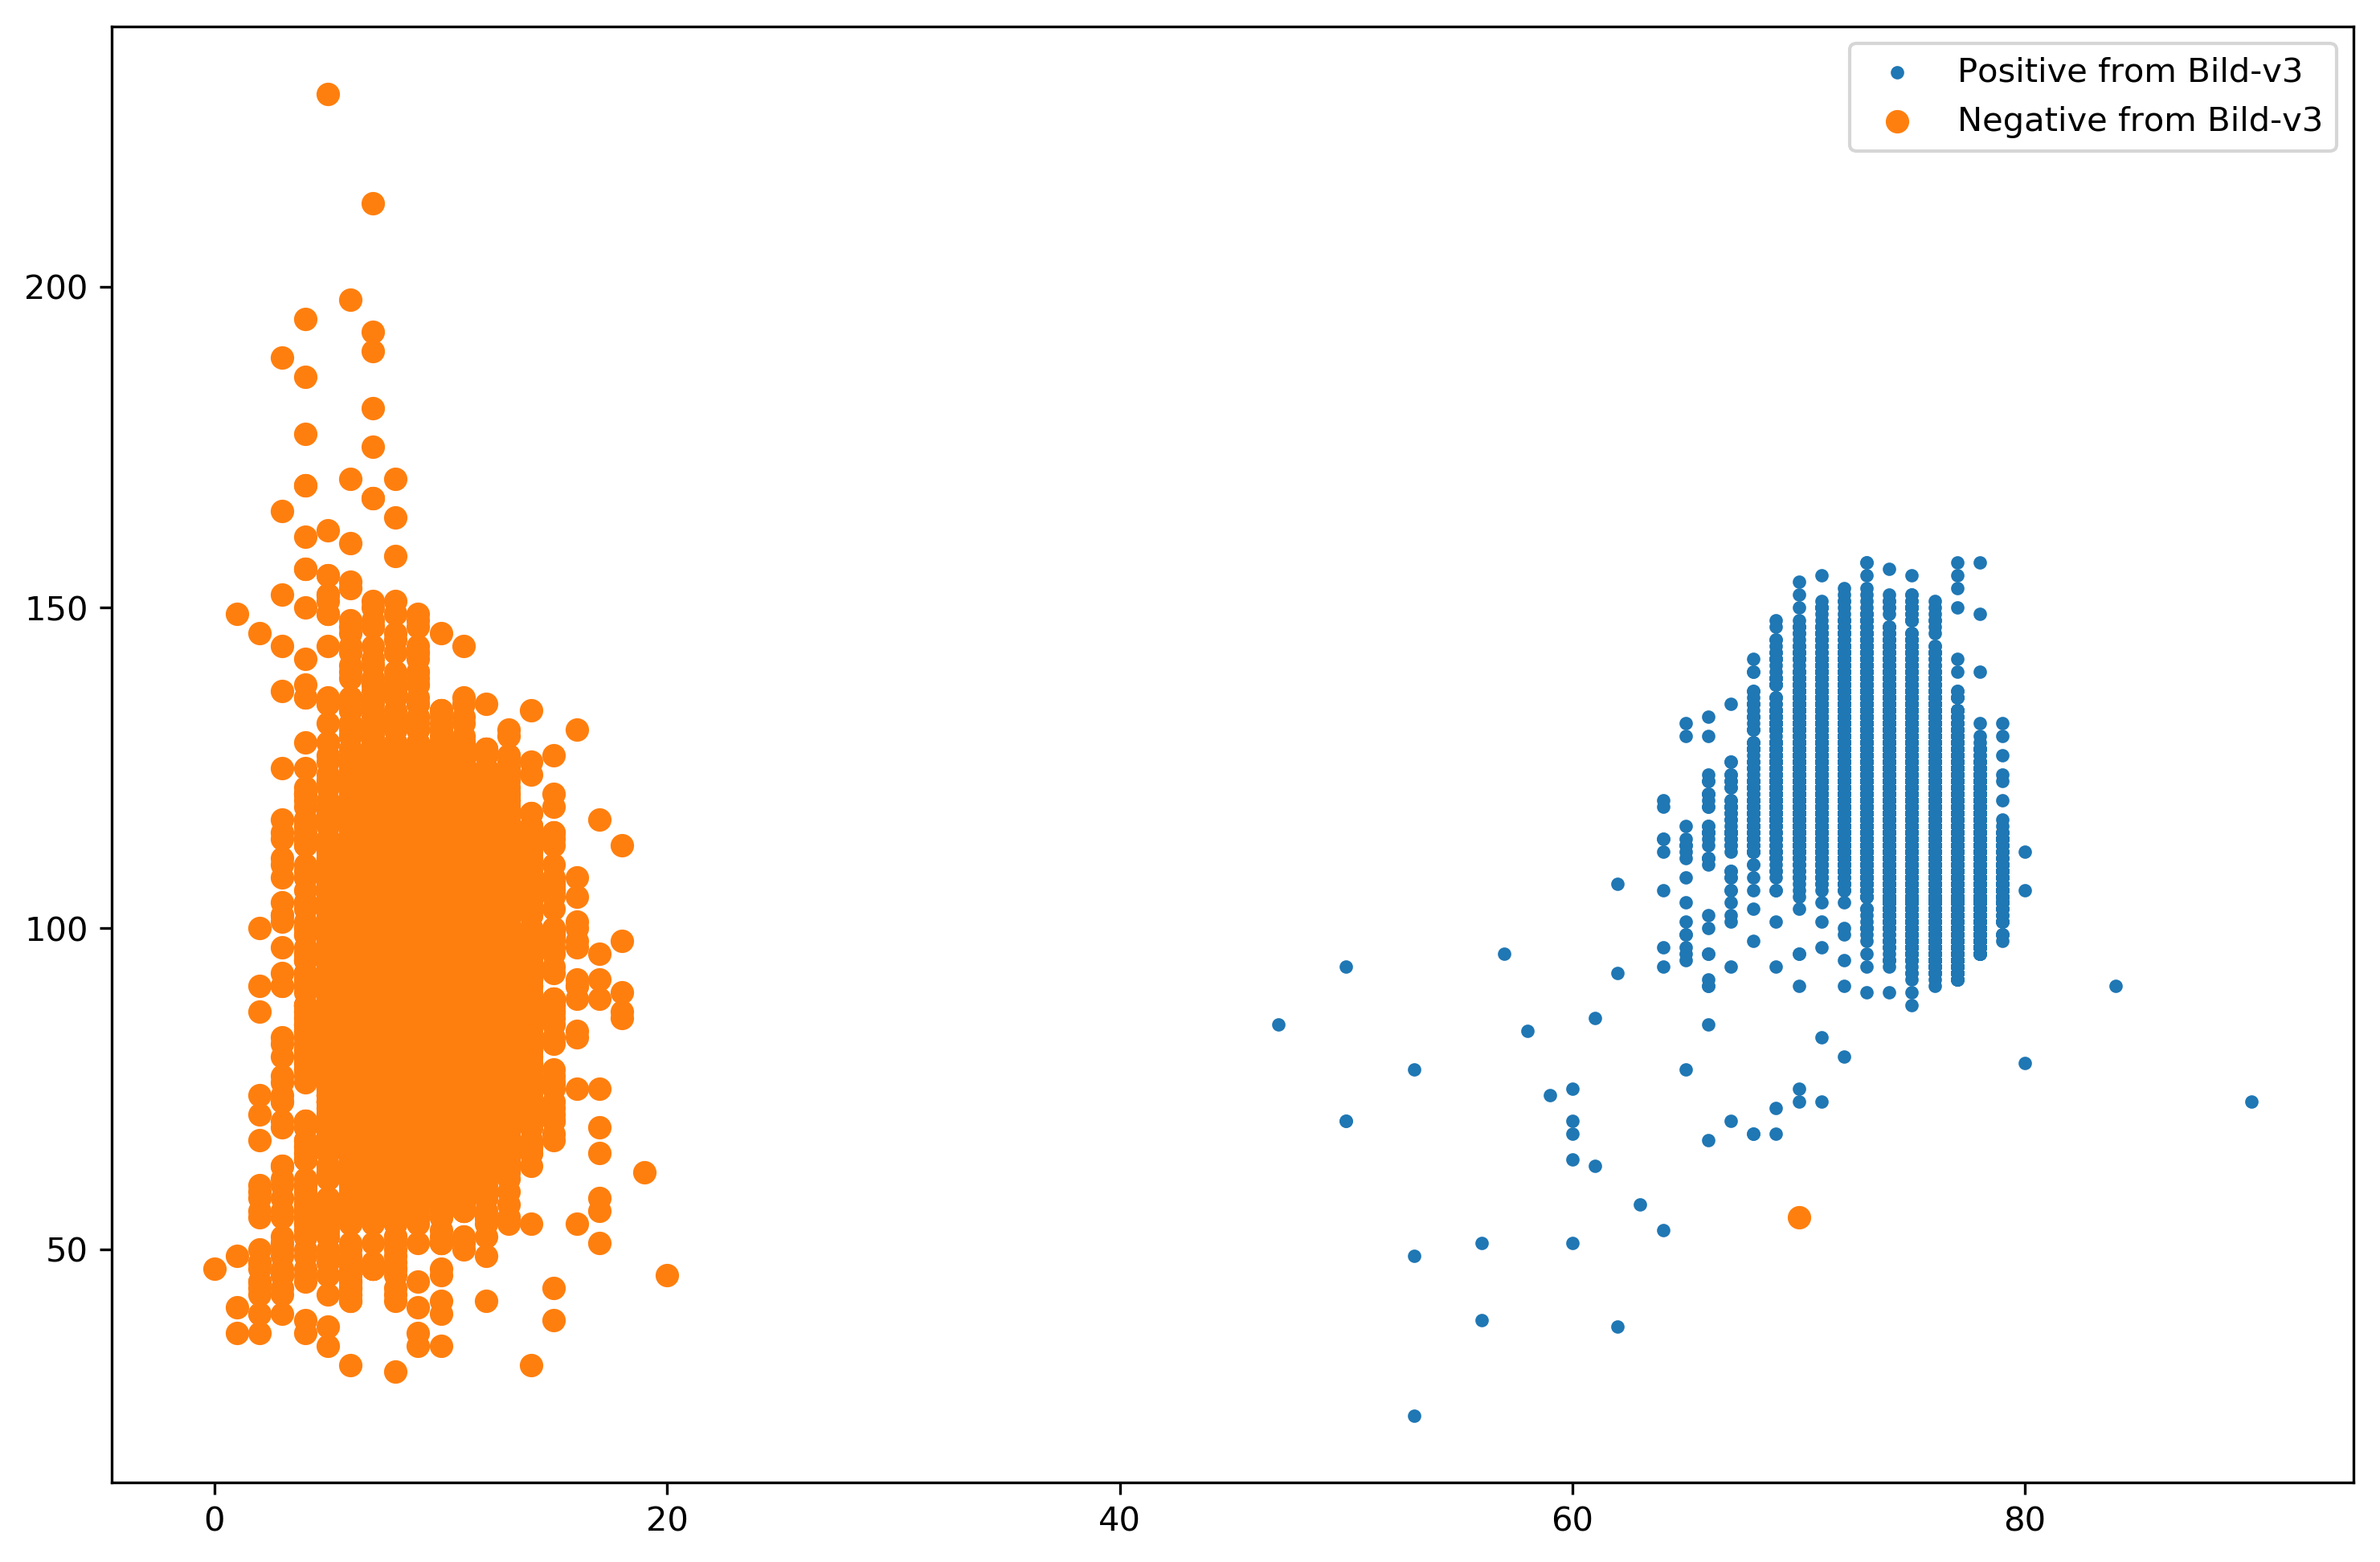

In [21]:
# n
n3 = 10
classes_reduced3 = classes[1::n3]
data_reduced3 = data[1::n3,:]
print("INFO: classes_reduced3.shape=" + str(classes_reduced3.shape))
print("INFO: data_reduced3.shape=" + str(data_reduced3.shape))

positives3 = data_reduced3[classes_reduced3==0]
negatives3 = data_reduced3[classes_reduced3==255]
print("INFO: positives3.shape=" + str(positives3.shape))
print("INFO: negatives3.shape=" + str(negatives3.shape))

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positives3[:,0], positives3[:,1], marker='.', label='Positive from Bild-v3')
ax.scatter(negatives3[:,0], negatives3[:,1], marker='o', label='Negative from Bild-v3')
ax.legend()

In [23]:
classifier2 = svm.SVC(C=0.5, gamma='auto')
classifier2.fit(data_reduced3, classes_reduced3)
classifier2.score(data,classes)

0.9859443319187243

In [24]:
classifier2.score(data2, classes2)

0.9847567836934157

(Text(0.5, 1.0, 'n = 10, C = 0.5'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

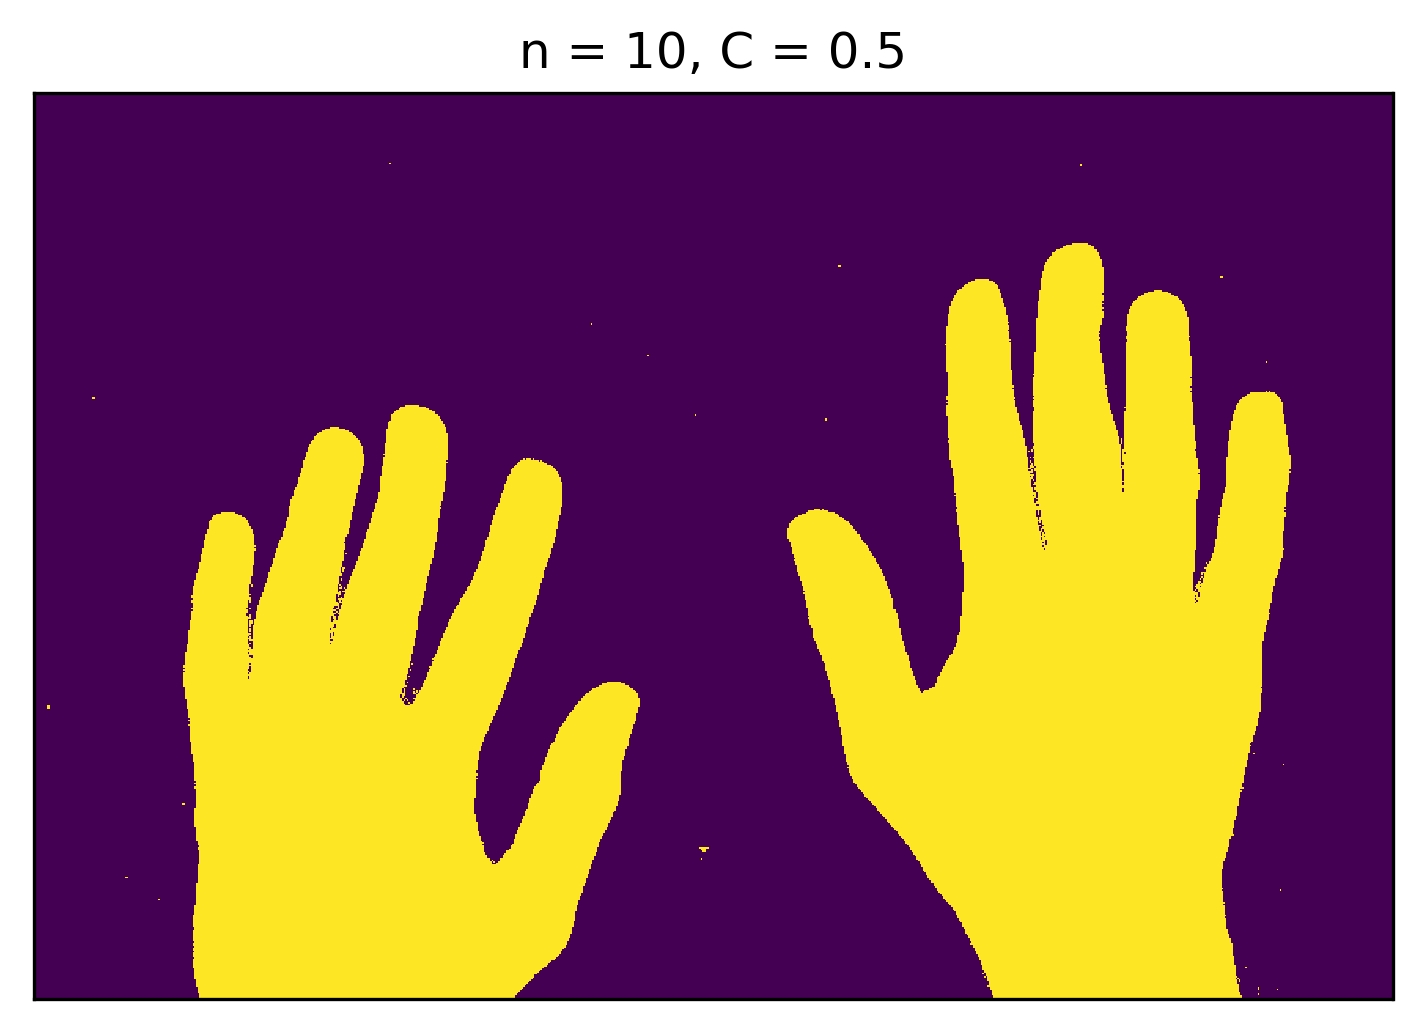

In [25]:
res_arr2 = classifier2.predict(data2)
res_img2 = res_arr2.reshape(576, -1)

plt.imshow(res_img2)
plt.title('n = 10, C = 0.5'), plt.xticks([]), plt.yticks([])

### Bild 2
#### 4 - Version mit n=10'000 und c = 5.0

In [28]:
n4 = 10000
classes_reduced4 = classes[1::n4]
data_reduced4 = data[1::n4,:]

classifier3 = svm.SVC(C=5.0, gamma='auto')
classifier3.fit(data_reduced4, classes_reduced4)
classifier3.score(data,classes)

0.7594099633487654

In [29]:
classifier3.score(data2, classes2)

0.6744751478909465

Text(0.5, 1.0, 'n = 1000, C = 5.0')

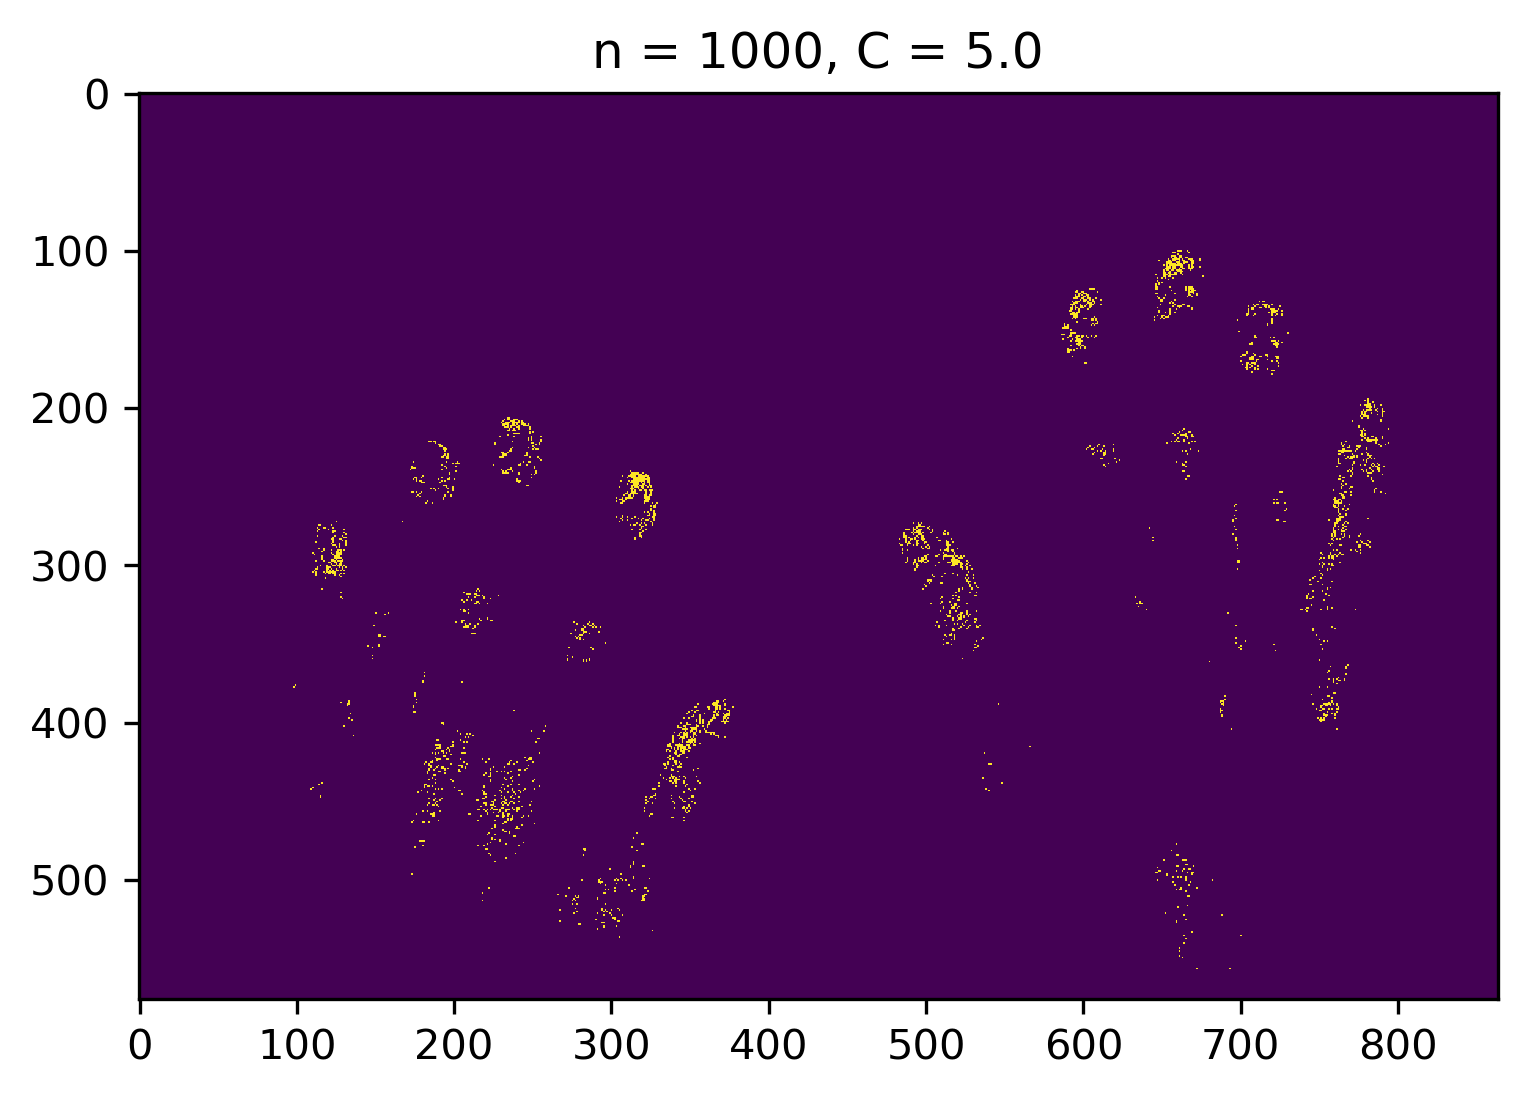

In [30]:
res_arr3 = classifier3.predict(data2)
res_img3 = res_arr3.reshape(576, -1)
plt.imshow(res_img3)
plt.title('n = 1000, C = 5.0')

#### Vergleich Bilder

(-0.5, 863.5, 575.5, -0.5)

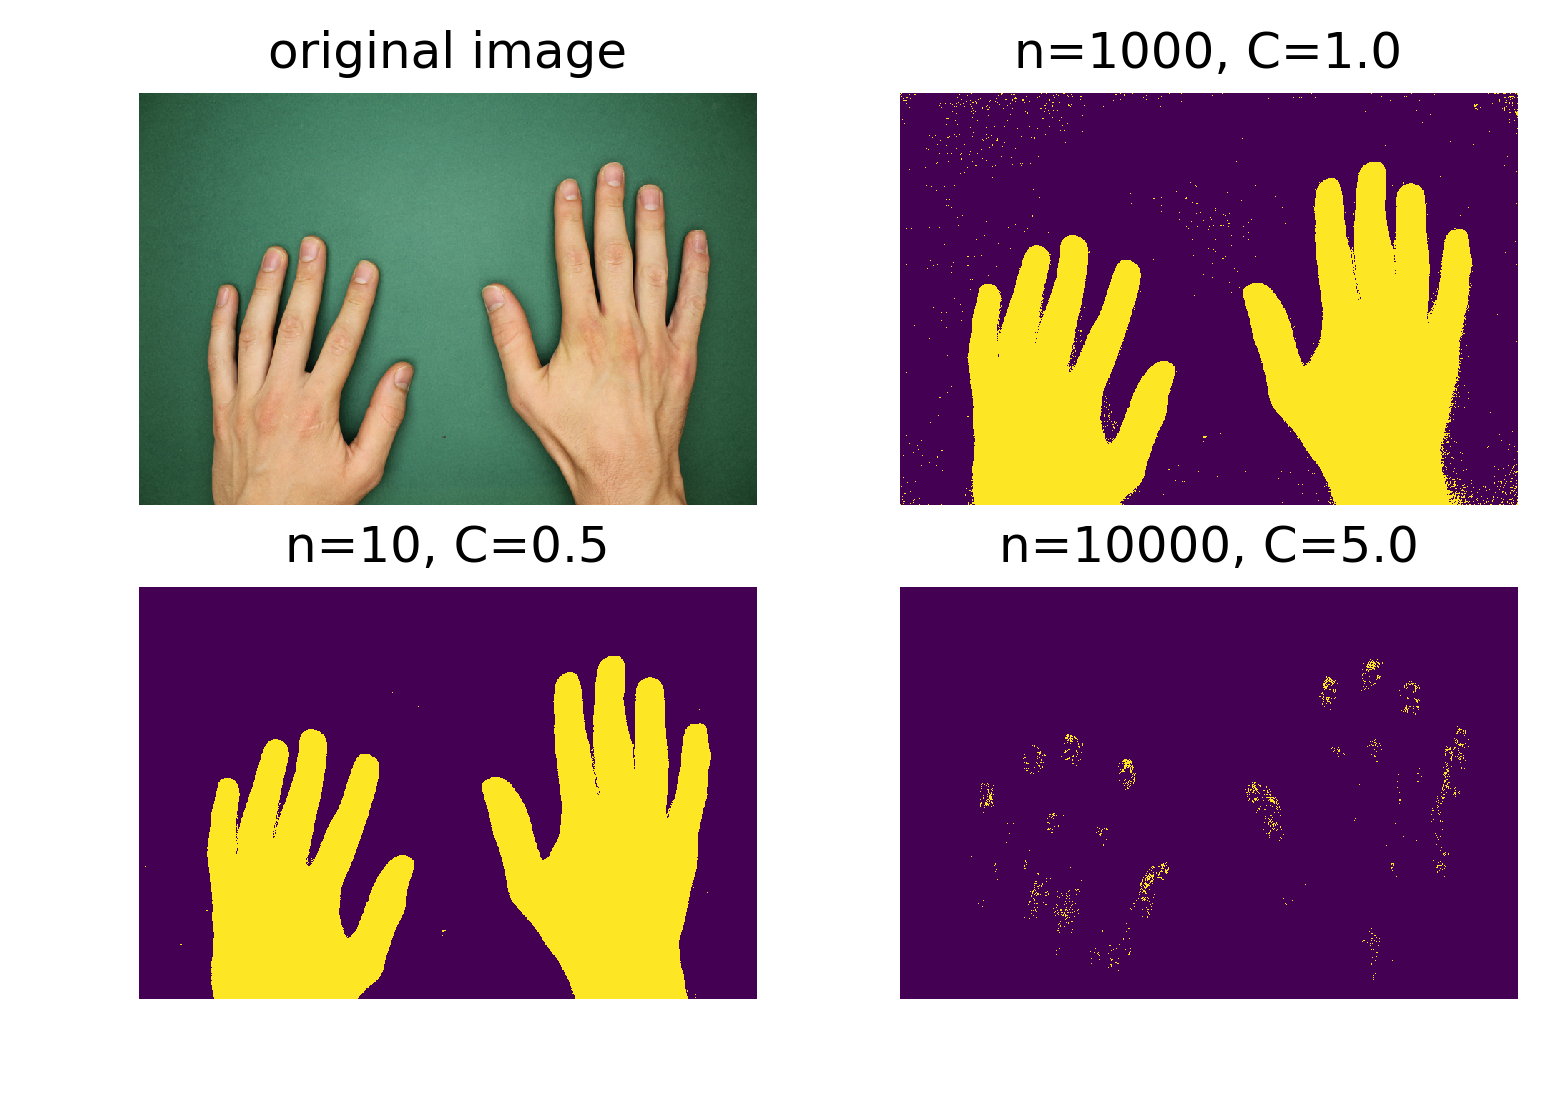

In [31]:
plt.subplot(2, 2, 1)
plt.imshow(image2)
plt.title('original image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(res_img1)
plt.title('n=1000, C=1.0')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(res_img2)
plt.title('n=10, C=0.5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(res_img3)
plt.title('n=10000, C=5.0')
plt.axis('off')